In [1]:
import plotly.io as pio
pio.renderers.default = 'notebook_connected'

## 가장 뜨는 제주도 핫플레이스

### 1. 인스타그램 크롤링

#### 1.1 인스타그램 게시글 정보 가져오기

In [1]:
#import selenium
from selenium import webdriver
#import beautifulsoup to work with html
from bs4 import BeautifulSoup
import pandas as pd
import time

#open chrome
driver = webdriver.Chrome("C:/Users/DooDoo/Desktop/data_analysis/chromedriver.exe")

In [2]:
driver.get("https://www.instagram.com")
time.sleep(2)

In [3]:
#get url of the search result
def insta_searching(word):
    url = "https://www.instagram.com/explore/tags/" + word
    return url

word = '제주도맛집'
url = insta_searching(word)
driver.get(url)

In [5]:
#select first result
def select_first(driver):
    first = driver.find_element_by_css_selector("div._9AhH0")
    first.click()
    time.sleep(3)

select_first(driver)

In [8]:
#get post info
import re
import unicodedata

def get_content(driver):
    # current page's html info
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')
    
    # content info
    try:
        content = soup.select('div.C4VMK > span')[0].text
        content = unicodedata.normalize('NFC', content)
    except:
        content = ' '
    
    # get hash tags
    # get all words that start with # and doesnt follow with space, ',', and '\'
    tags = re.findall(r'#[^/s#,\\]+', content)

    # get date
    date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]
    
    # get likes
    try:
        like = soup.select('div.Nm9Fw > button')[0].text[4:-1]
    except:
        like = 0
    
    # get location
    try:
        place = soup.select('div.M30cS')[0].text
        place = unicodedata.normalize('NFC', place)
    except:
        place = ''
        
    # save collected data
    data = [content, date, like, place, tags]
    return data

get_content(driver)

['📍함스타_홈쿡⠀코로나 땜에😷 집에서 집콕하는 분들을 위한(?)🌟함스타_라면레시피_알려드릴게요🥢⠀⠀✅재료안성탕면,계란2개,물500ml(다른라면사용해도상관없음)⠀✅조미료👉🏻고추가루 1스푼🥄👉🏻다진마늘 1/2🥄👉🏻식초 1/2스푼🥄👉🏻후추 1/3스푼🥄⠀✅만드는방법👉🏻냄비에 물 500ml 넣는다👉🏻물이 끓면 라면스프와+조미료를 넣는다👉🏻라면을 넣고 30초후에 계란도 넣는다👉🏻중불보다 좀더 약한불로🔥 3분정도 더끓인다👉🏻식초는 불끄기 직전 숟가락 반스푼정도 넣는다👉🏻대접에 옮기고 밑에 깔린 계란을 올려서 가른다👉🏻콧물 흘리며 맛있게 먹어준다😺👉🏻밥까지 말아먹으면 배운사람👨🏻\u200d🔬⠀⠀#함스타라면 #식초라면#비밀레시피 #맛도리',
 '2021-01-07',
 '3,770',
 'Yeoksam-dong',
 ['#함스타라면 ', '#식초라면', '#비밀레시피 ', '#맛도리']]

In [11]:
def move_next(driver):
    right = driver.find_element_by_css_selector('a.coreSpriteRightPaginationArrow')
    right.click()
    time.sleep(3)

move_next(driver)

In [12]:
# combine all to get first 500 results

# make search page
word = "제주도맛집"
url = insta_searching(word)

# get to the page
driver.get(url)
time.sleep(3)

# get first result
select_first(driver)

# make results variable
results = []

# repeat to get first 500 results
target = 500
for i in range(target):
    # wait for 2 seconds after each search
    try:
        data = get_content(driver)
        results.append(data)
        move_next(driver)
    except:
        time.sleep(2)
        move_next(driver)
        
print(results[:2])

[['산도롱맨도롱----------🍜제주 유일무이 고기국수 맛집🍜쫀덕쫀덕한 모찌새우와알싸한 홍갈비국수!100%사골육수로 진하게 우려낸백갈비국수와 몸국으로 속든든한 제주여행을 계획해보세요! ..산도롱맨도롱동절기영업시간:08:00~20:00(last 19:00)문의 : 064-782-5105.#제주도맛집#제주맛집#제주도고기국수#성산일출봉맛집#광치기해변맛집#제주돔베고기#성산일출봉고기국수맛집#제주도점심#성산아침식사#성산일출봉아침식사', '2021-01-08', '1,410', '', ['#제주도맛집', '#제주맛집', '#제주도고기국수', '#성산일출봉맛집', '#광치기해변맛집', '#제주돔베고기', '#성산일출봉고기국수맛집', '#제주도점심', '#성산아침식사', '#성산일출봉아침식사']], ['📍함스타_홈쿡⠀코로나 땜에😷 집에서 집콕하는 분들을 위한(?)🌟함스타_라면레시피_알려드릴게요🥢⠀⠀✅재료안성탕면,계란2개,물500ml(다른라면사용해도상관없음)⠀✅조미료👉🏻고추가루 1스푼🥄👉🏻다진마늘 1/2🥄👉🏻식초 1/2스푼🥄👉🏻후추 1/3스푼🥄⠀✅만드는방법👉🏻냄비에 물 500ml 넣는다👉🏻물이 끓면 라면스프와+조미료를 넣는다👉🏻라면을 넣고 30초후에 계란도 넣는다👉🏻중불보다 좀더 약한불로🔥 3분정도 더끓인다👉🏻식초는 불끄기 직전 숟가락 반스푼정도 넣는다👉🏻대접에 옮기고 밑에 깔린 계란을 올려서 가른다👉🏻콧물 흘리며 맛있게 먹어준다😺👉🏻밥까지 말아먹으면 배운사람👨🏻\u200d🔬⠀⠀#함스타라면 #식초라면#비밀레시피 #맛도리', '2021-01-07', '3,866', 'Yeoksam-dong', ['#함스타라면 ', '#식초라면', '#비밀레시피 ', '#맛도리']]]


In [13]:
results_df = pd.DataFrame(results)
results_df.columns = ['content', 'data', 'like', 'place', 'tags']
results_df.to_excel('./1_crawling_jejudoMatJip.xlsx', index = False)

#### 1.2 크롤링 정보 시각화 (워드 클라우드)

In [21]:
jeju_insta_df = pd.DataFrame([ ])

folder = './files/'
f_list = ['1_crawling_jejudoMatJip.xlsx', '1_crawling_jejudoGwanGwang.xlsx', '1_crawling_jejuMatJip.xlsx', '1_crawling_jejuYeoHang.xlsx']

for fname in f_list:
    fpath = folder + fname
    temp = pd.read_excel(fpath)
    jeju_insta_df = jeju_insta_df.append(temp)
    
jeju_insta_df.columns = ['content', 'data', 'like', 'place', 'tags']

# get rid of duplicates
jeju_insta_df.drop_duplicates(subset = ['content'], inplace = True)
jeju_insta_df.to_excel('./files/1_crawling_raw.xlsx', index = False)

In [23]:
## make word cloud
raw_total = pd.read_excel("./files/1_crawling_raw.xlsx")
raw_total["tags"][:3]

0    ['#제주분식', '#제주맛집', '#제주도맛집', '#제주맛집추천', '#제주도맛...
1    ['#함덕맛집', '#제주도카페투어', '#제주일상', '#함덕', '#jejudo...
2    ['#동문시장', '#제주동문시장', '#제주도기념품', '#제주기념품', '#제주...
Name: tags, dtype: object

In [35]:
# when reading excel with list variable, it read the whole text as a string
# need to seperate as a list 
tags_total = []

for tags in raw_total["tags"]:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)

In [36]:
tags_total[:2]

['#제주분식', '#제주맛집']

In [37]:
# use counter to count through hash tags
from collections import Counter
tags_counts = Counter(tags_total)
tags_counts.most_common(10)

[('#제주맛집', 3412),
 ('#제주도맛집', 3149),
 ('#제주여행', 3020),
 ('#제주관광', 2827),
 ('#제주도', 2053),
 ('#제주', 1538),
 ('#제주도여행', 1454),
 ('#서귀포맛집', 1330),
 ('#제주도가볼만한곳', 1014),
 ('#제주핫플레이스', 835)]

In [38]:
# remove tags that are unrelated
STOPWORDS = ['#일상', '#선팔', '#제주도', '#jeju' '#반영구',
            '#제주자연눈썹', '#서귀포눈썹문신', '#제주눈썹문신', '#소통', '#맞팔']

tag_total_selected = []
for tag in tags_total:
    if tag not in STOPWORDS:
        tag_total_selected.append(tag)
        
tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(50)

[('#제주맛집', 3412),
 ('#제주도맛집', 3149),
 ('#제주여행', 3020),
 ('#제주관광', 2827),
 ('#제주', 1538),
 ('#제주도여행', 1454),
 ('#서귀포맛집', 1330),
 ('#제주도가볼만한곳', 1014),
 ('#제주핫플레이스', 835),
 ('#서귀포', 825),
 ('#jeju', 749),
 ('#제주흑돼지맛집', 685),
 ('#제주맛집추천', 675),
 ('#제주도흑돼지맛집', 669),
 ('#제주도흑돼지', 663),
 ('#성산일출봉', 650),
 ('#제주흑돼지', 648),
 ('#협재맛집', 602),
 ('#제주카페', 600),
 ('#제주도그램', 594),
 ('#서귀포흑돼지맛집', 593),
 ('', 587),
 ('#서귀포흑돼지', 577),
 ('#제주도민', 570),
 ('#섭지코지', 556),
 ('#성산일출봉맛집', 545),
 ('#섭지코지맛집', 511),
 ('#제주가볼만한곳', 497),
 ('#통갈치구이', 494),
 ('#제주통갈치구이', 485),
 ('#제주핫플', 483),
 ('#제주살이', 480),
 ('#제주서귀포맛집', 479),
 ('#제주도민맛집', 477),
 ('#여행스타그램', 472),
 ('#제주반영구', 440),
 ('#제주도관광', 440),
 ('#여행', 436),
 ('#제주시', 419),
 ('#제주스타그램', 408),
 ('#눈썹문신', 405),
 ('#반영구', 405),
 ('#중문맛집', 404),
 ('#제주일상', 398),
 ('#제주속눈썹', 397),
 ('#먹스타그램', 395),
 ('#서귀포반영구', 395),
 ('#서귀포속눈썹', 395),
 ('#제주남자눈썹문신', 395),
 ('#서귀포자연눈썹', 395)]

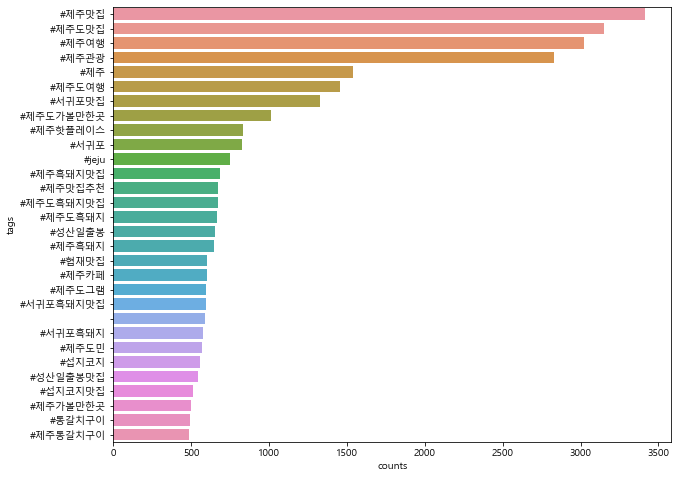

In [44]:
# get bar chart
# get wordcloud library

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys

if sys.platform in ["win32", "win64"]:
    font_name = "malgun gothic"
elif sys.platform == "darwin":
    font_name = "AppleGothic"

rc('font',family=font_name)

tags_counts_df= pd.DataFrame(tag_counts_selected.most_common(30))
tags_counts_df.columns = ['tags', 'counts']

plt.figure(figsize = (10,8))
sns.barplot(x='counts', y='tags', data = tags_counts_df)


(-0.5, 799.5, 399.5, -0.5)

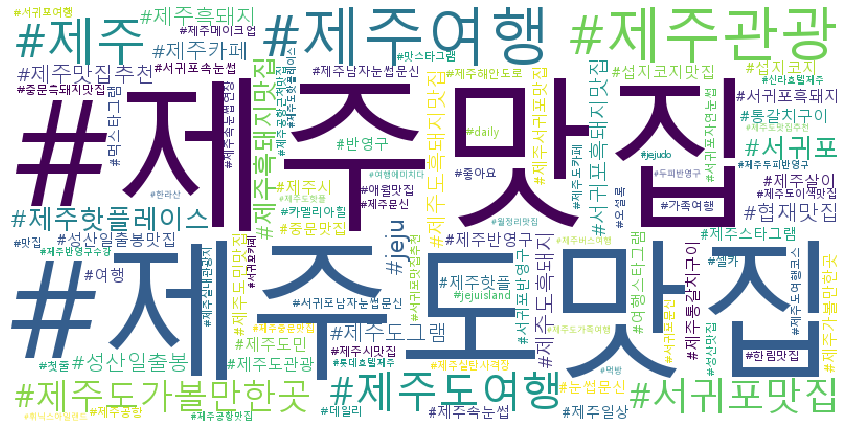

In [46]:
# create wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud    
import platform

if platform.system() == 'Windows':   #windos
    font_path = "c:/Windows/Fonts/malgun.ttf"
elif platform.system() == "Darwin":   #Mac
    font_path = "/Users/$USER/Library/Fonts/AppleGothic.ttf"
    
wordcloud = WordCloud(font_path = font_path,
                     background_color = 'white',
                     max_words = 100,
                     relative_scaling = 0.3,
                     width = 800,
                     height = 400,
                     ).generate_from_frequencies(tag_counts_selected)
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis('off')
